<center><font size="5">Extracción y análisis de Datos de FRED (Federal Reserve Economic Data)</font></center>

Introducción:  
Ya que este proyecto tiene como objetivo analizar la viabilidad de la expansión de la cadena de restaurantes Nordsee a los Estados Unidos, se decidió incorporar un análisis exhaustivo del contexto macroeconómico estadounidense, utilizando datos provenientes de la base de datos FRED (Federal Reserve Economic Data).

Los datos macroeconómicos obtenidos de FRED servirán como base para evaluar diversos factores que podrían influir en el éxito de Nordsee en el mercado estadounidense, como el poder adquisitivo de los consumidores, las tendencias de consumo de alimentos y las condiciones económicas generales.


In [66]:
import requests
import pyarrow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Definir la clave de la API y el URL base
api_fred_key = '0a9d1712b624ae3d4ff4546cd94cc1ee'
base_url = "https://api.stlouisfed.org/fred/series/observations"

# Lista de IDs de las series que quieres obtener
series_ids = {
    'Consumer Price Index': 'CPIAUCSL',
    'Unemployment Rate': 'UNRATE',
    'Gross Domestic Product': 'GDP',
    'Federal Funds Rate': 'FEDFUNDS',
    'Industrial Production Index': 'INDPRO',
    'Public Debt': 'GFDEBTN',
    'M2 Money Stock': 'WM2NS',
    '10-Year Breakeven Inflation Rate': 'T10YIE',
    'Real Gross Domestic Product': 'GDPC1',
    'Producer Price Index': 'PPIACO'
}

# Función para obtener datos de la API FRED
def get_fred_data(series_id, start_date, end_date):
    params = {
        'series_id': series_id,
        'api_key': api_fred_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    df = df[['date', 'value']]  # Asegurarse de que solo tenga 'date' y 'value'
    df = df.set_index('date')
    return df

# Parámetros de fecha (modifica las fechas según tus necesidades)
start_date = '2000-01-01'
end_date = '2023-12-31'

# Obtener y guardar datos en un archivo Parquet
all_data = []

for series_name, series_id in series_ids.items():
    df_series = get_fred_data(series_id, start_date, end_date)
    df_series.columns = [series_name]  # Renombrar la columna 'value' con el nombre de la serie
    all_data.append(df_series)

# Concatenar todos los DataFrames en uno solo
df_all = pd.concat(all_data, axis=1)

# Guardar en archivo Parquet
#df_all.to_parquet('fred_data.parquet', index=False)
print("Datos guardados en 'fred_data.parquet' exitosamente.")

Datos guardados en 'fred_data.parquet' exitosamente.


In [68]:
# Top 10 
top_10_series = {
    'Consumer Price Index': 'CPIAUCSL',
    'Unemployment Rate': 'UNRATE',
    'Gross Domestic Product': 'GDP',
    'Federal Funds Rate': 'FEDFUNDS',
    'Industrial Production Index': 'INDPRO',
    'Public Debt': 'GFDEBTN',
    'M2 Money Stock': 'WM2NS',
    '10-Year Breakeven Inflation Rate': 'T10YIE',
    'Real Gross Domestic Product': 'GDPC1',
    'Producer Price Index': 'PPIACO'
}

def get_fred_data(series_id, start_date, end_date):
    params = {
        'series_id': series_id,
        'api_key': api_fred_key,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(base_url, params=params)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df.set_index('date')['value']

In [69]:
api_fred_key = '0a9d1712b624ae3d4ff4546cd94cc1ee' 


series_ids = {
    'Consumer Price Index': 'CPIAUCSL',
    'M2 Money Stock': 'WM2NS',
    'Unemployment Rate': 'UNRATE',
    'M1 Money Stock': 'WM1NS',
    'Gross Domestic Product': 'GDP',
    '10-Year Breakeven Inflation Rate': 'T10YIE',
    'Monetary Base': 'BOGMBASE',
    'Real Gross Domestic Product': 'GDPC1',
    'Federal Funds Rate': 'FEDFUNDS',
    'Trade Balance': 'BOPGSTB',
    'Public Debt': 'GFDEBTN',
    'Industrial Production Index': 'INDPRO',
    'Consumer Confidence Index': 'UMCSENT',
    'Producer Price Index': 'PPIACO',
    'Retail Sales': 'RSXFS',
    'House Price Index': 'CSUSHPINSA',
    'Housing Starts': 'HOUST',
    'Initial Jobless Claims': 'ICSA',
    'Labor Productivity': 'OPHNFB',
    'Purchasing Power Parity Converted GDP Per Capita':'RGDPCHUSA625NUPN',
}

base_url = "https://api.stlouisfed.org/fred/series/observations"

In [70]:
data = []

for series_name, series_id in series_ids.items():
    params = {
        'series_id': series_id,
        'api_key': api_fred_key,
        'file_type': 'json',
        'sort_order': 'desc',
        'limit': 1
    }
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200: #Si la solicitud es exitosa:
        json_data = response.json()['observations']
        if json_data:
            latest_observation = json_data[0]
            value = float(latest_observation['value']) if latest_observation['value'] not in ('.', 'NaN') else None
            date = latest_observation['date']
            data.append({
                'Series': series_name,
                'Value': value,
                'Date': date
            })
        else:
            print(f"No data available for {series_name}")
    else:
        print(f"Error fetching data for {series_name}: {response.status_code}")

In [71]:
df_final = pd.DataFrame(data)
df_final.set_index('Date', inplace=True)


for column in df_final.select_dtypes(include=['float64']).columns:
    df_final[column] = df_final[column].apply(lambda x: '{:.2f}'.format(x))


# Mostrar el DataFrame final con fechas
df_final

,Series,Value
Date,,
2024-10-01,Consumer Price Index,315.45
2024-09-30,M2 Money Stock,21154.60
2024-10-01,Unemployment Rate,4.10
2024-09-30,M1 Money Stock,18115.80
2024-07-01,Gross Domestic Product,29349.92
2024-11-14,10-Year Breakeven Inflation Rate,2.33
2024-09-01,Monetary Base,5588.40
2024-07-01,Real Gross Domestic Product,23386.25
2024-10-01,Federal Funds Rate,4.83


In [72]:
# Seteamos 10 años de datos.
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=3650)).strftime('%Y-%m-%d')

# Busca los datos para todas las series
data = {}
for name, series_id in top_10_series.items():
    data[name] = get_fred_data(series_id, start_date, end_date)

In [73]:
def plot_indicator(indicator_name, data, color_palette='coolwarm'):
    plt.figure(figsize=(12, 6))
    
    # Establecer el estilo y la paleta de colores
    sns.set_style("darkgrid")  # Fondo oscuro con cuadrícula
    sns.set_palette("Greens")  # Paleta de colores en tonos verdes

    # Crear el gráfico de línea
    ax = sns.lineplot(x=data.index, y=data.values, linewidth=2)

    # Personalizar el gráfico
    plt.title(f'{indicator_name} (Últimos 10 años)', fontsize=16, color='white')
    plt.xlabel('Año', fontsize=12, color='white')
    plt.ylabel('Valores', fontsize=12, color='white')
    plt.xticks(rotation=45, color='white')
    plt.yticks(color='white')

    # Área bajo la curva
    ax.fill_between(x=data.index, y1=data.values, alpha=0.3, color='lightgreen')

    # Puntos de datos
    sns.scatterplot(x=data.index, y=data.values, s=30, color='darkgreen')

    # Ajustar la imagen
    plt.tight_layout()
    plt.show()

Índice de Precios al Consumidor (CPI):
Mide el cambio promedio en los precios que los consumidores urbanos pagan por una canasta de bienes y servicios.
Un aumento constante en el CPI indica inflación, lo que significa que el poder adquisitivo del dinero está disminuyendo.
Una tasa de inflación moderada (alrededor del 2% anual) se considera generalmente saludable para la economía.
Una inflación alta puede llevar a la incertidumbre económica y erosionar el valor de los ahorros.
Una disminución en el CPI (deflación) puede ser problemática, ya que puede llevar a una espiral deflacionaria donde los consumidores posponen las compras, esperando precios más bajos.


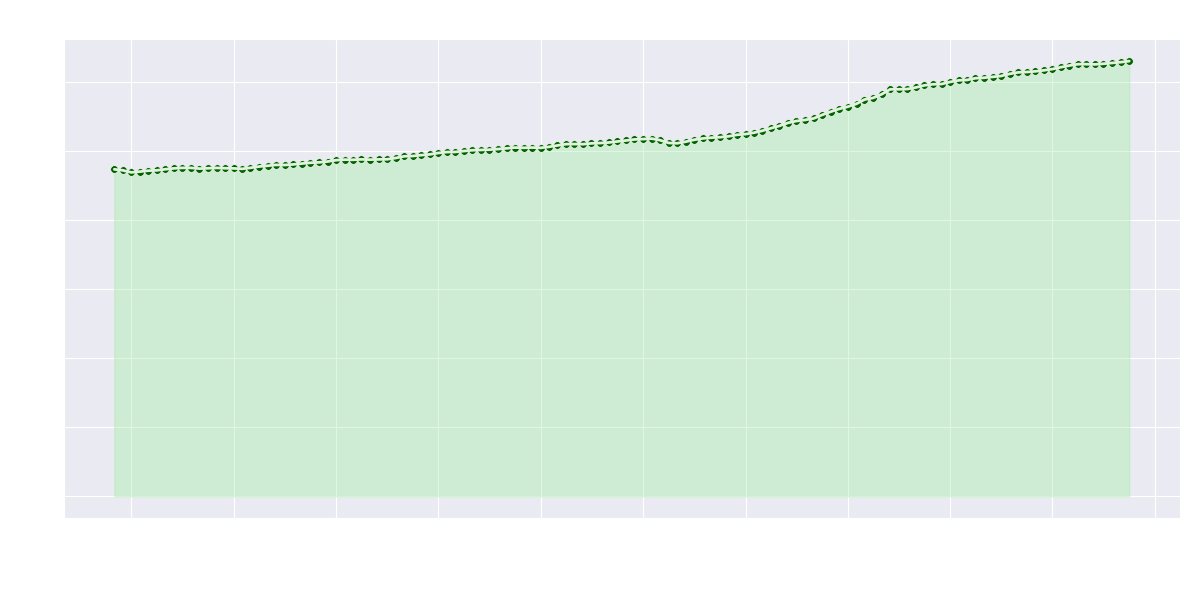

In [74]:
pd.option_context('mode.use_inf_as_na', True)
plot_indicator('CPI', data['Consumer Price Index'], color_palette='coolwarm')

Producto Interno Bruto (GDP):
Es el valor total de todos los bienes y servicios producidos en un país en un período específico.
Una tendencia ascendente indica expansión económica, mientras que una tendencia descendente puede señalar una recesión.
El crecimiento del PIB se considera saludable cuando es sostenible a largo plazo, generalmente entre el 2% y el 3% anual para economías desarrolladas.
Un crecimiento demasiado rápido puede llevar a presiones inflacionarias, mientras que un crecimiento lento o negativo puede resultar en aumento del desempleo y disminución del nivel de vida


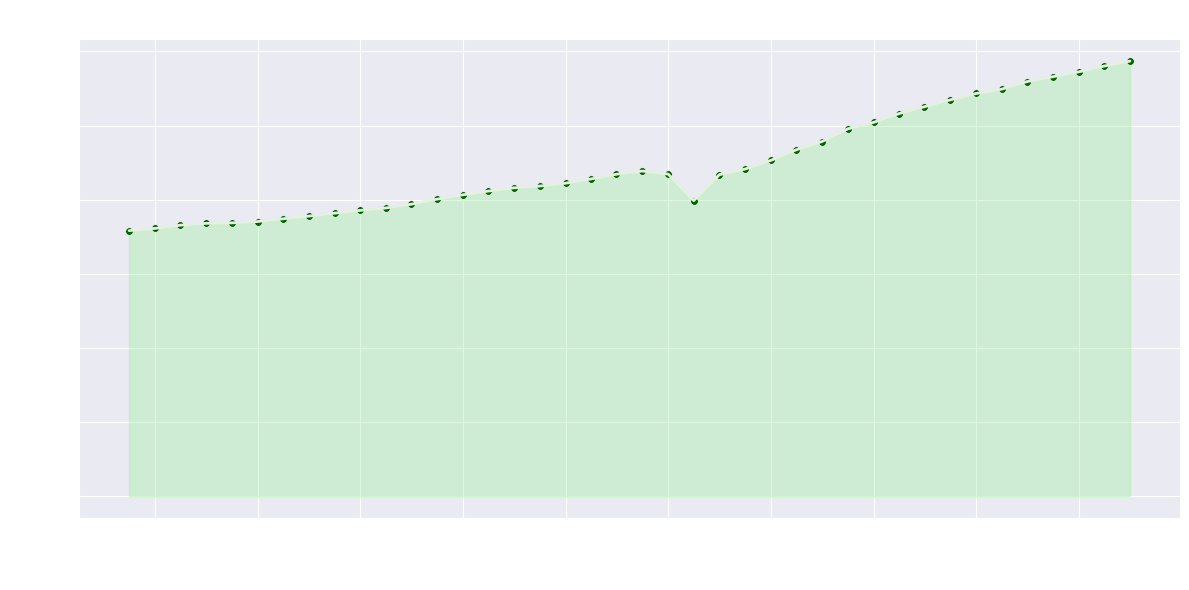

In [75]:
plot_indicator('GDP', data['Gross Domestic Product'], color_palette='coolwarm')

Tasa de Fondos Federales:
Es la tasa de interés a la que los bancos se prestan dinero entre sí durante la noche.
La Reserva Federal utiliza esta tasa como una herramienta principal de política monetaria.
Tasas bajas suelen estimular la economía al hacer que el crédito sea más accesible, fomentando el gasto y la inversión.
Tasas altas pueden frenar la inflación al hacer que el crédito sea más caro, lo que puede ralentizar el crecimiento económico.
Los cambios en esta tasa pueden afectar a otras tasas de interés en toda la economía, incluyendo hipotecas y préstamos comerciales


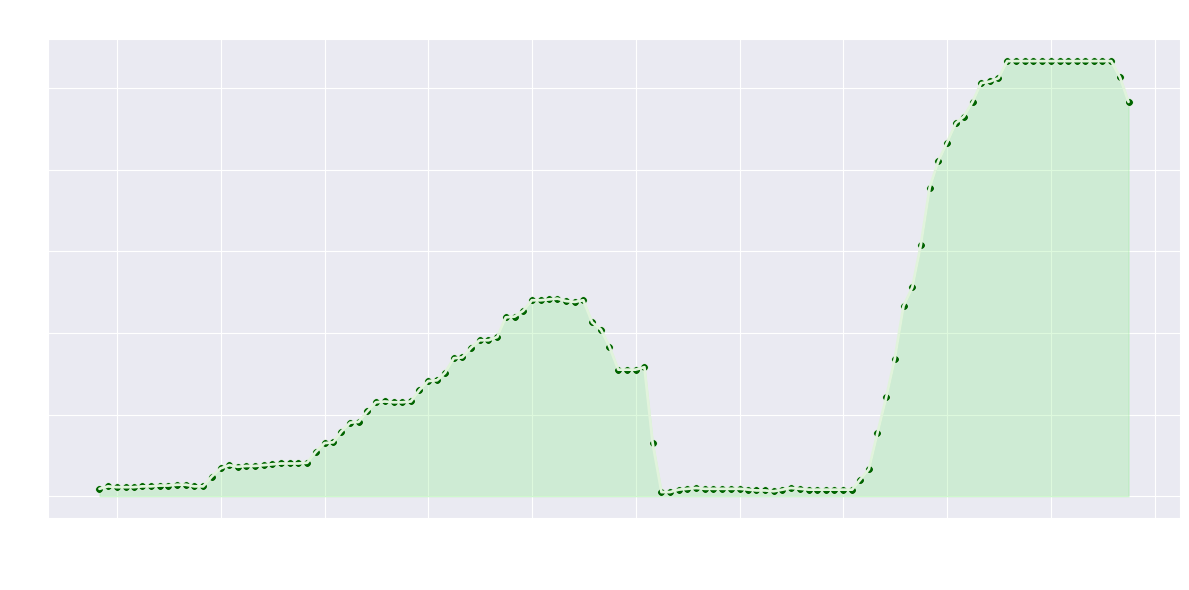

In [76]:
plot_indicator('Tasa de Fondos Federales', data['Federal Funds Rate'], color_palette='coolwarm')

Índice de Producción Industrial:
Mide el output del sector manufacturero, minero, eléctrico y de gas de una economía.
Un aumento en este índice sugiere expansión económica, particularmente en el sector manufacturero.
Es un indicador líder, lo que significa que a menudo cambia antes que la economía en general.
Puede proporcionar información sobre la demanda futura de bienes y el estado general de la economía.


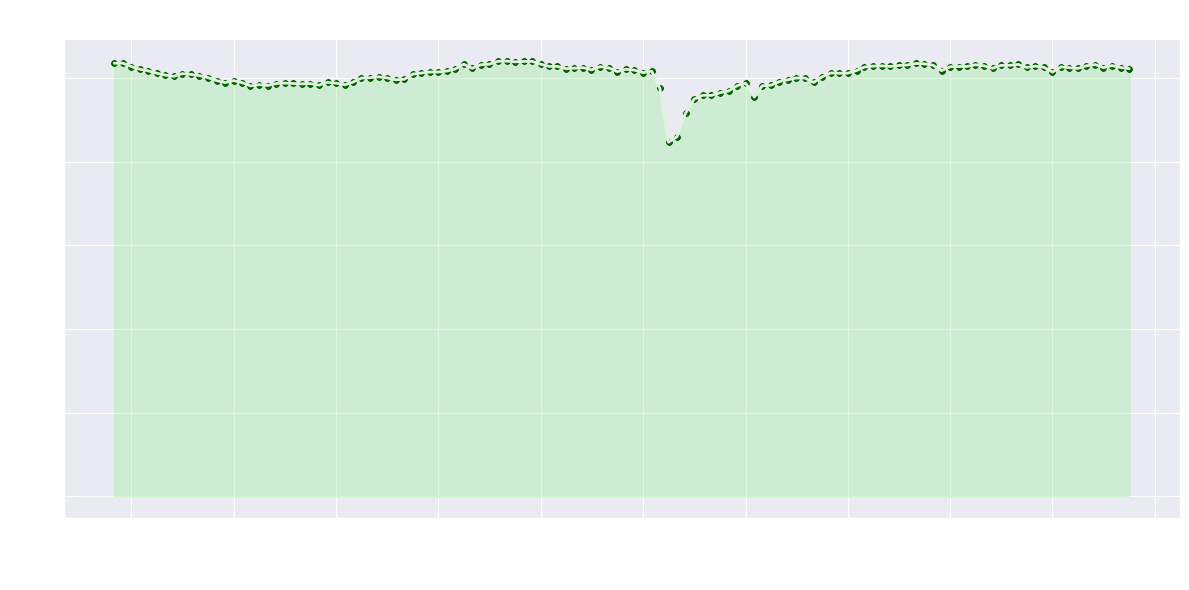

In [77]:
plot_indicator('Industrial Production Index', data['Industrial Production Index'], color_palette='coolwarm')

Oferta Monetaria M2:
Incluye efectivo, depósitos a la vista, y activos líquidos a corto plazo como cuentas de ahorro y fondos del mercado monetario.
Un aumento rápido en M2 podría indicar riesgos inflacionarios, ya que más dinero en circulación puede llevar a un aumento en los precios.
Sin embargo, la relación entre M2 y la inflación no es siempre directa, especialmente en períodos de baja velocidad del dinero.
Los bancos centrales monitorean M2 como parte de su estrategia de política monetaria


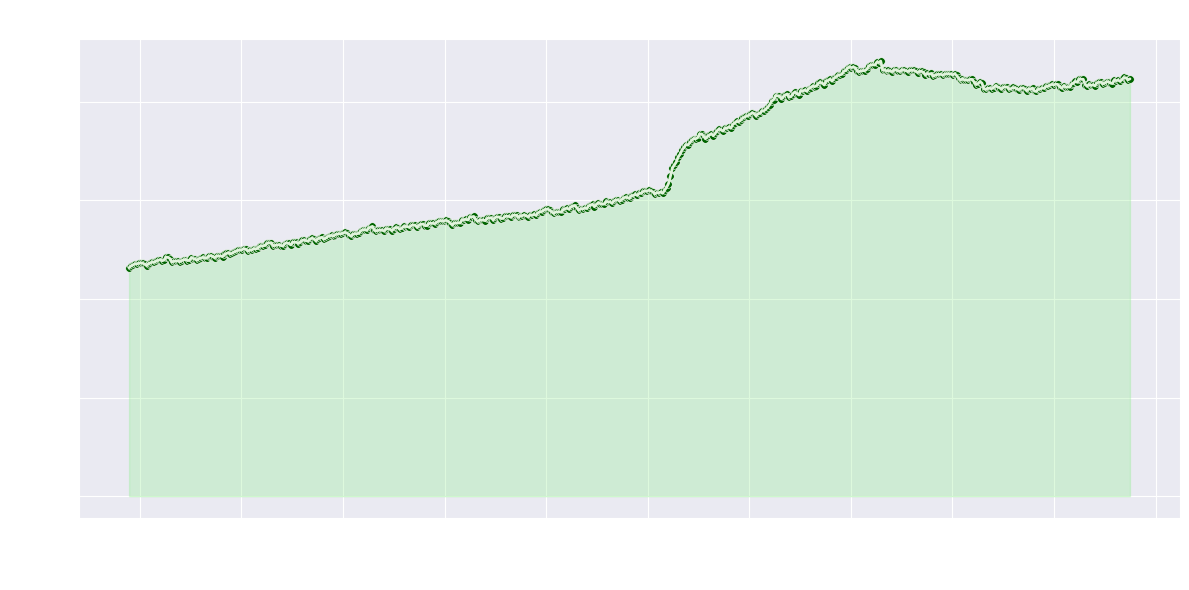

In [78]:
plot_indicator('M2 Money Stock', data['M2 Money Stock'], color_palette='coolwarm')

Tasa de Inflación de Equilibrio a 10 Años:
Es la diferencia entre el rendimiento de los bonos del Tesoro a 10 años y el de los Valores Protegidos contra la Inflación del Tesoro (TIPS) a 10 años.
Refleja las expectativas de inflación a largo plazo del mercado.
Es un indicador importante para los bancos centrales al formular la política monetaria.
Puede influir en las decisiones de inversión a largo plazo y en la fijación de precios de activos financieros


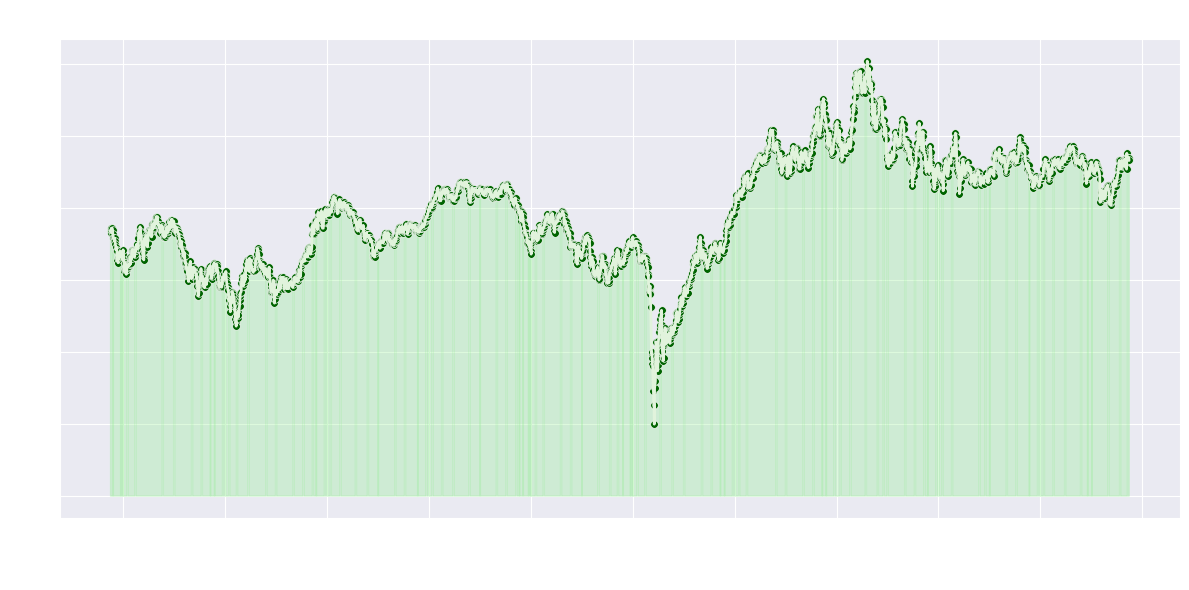

In [79]:
plot_indicator('10-Year Breakeven Inflation Rate', data['10-Year Breakeven Inflation Rate'], color_palette='coolwarm')

PIB Real:
Es el PIB ajustado por inflación, lo que proporciona una medida más precisa del crecimiento económico real.
Permite comparaciones significativas del crecimiento económico a lo largo del tiempo y entre países.
Un crecimiento constante del PIB real indica una expansión económica sostenible.
Es crucial para evaluar la salud general de la economía y la efectividad de las políticas económicas.


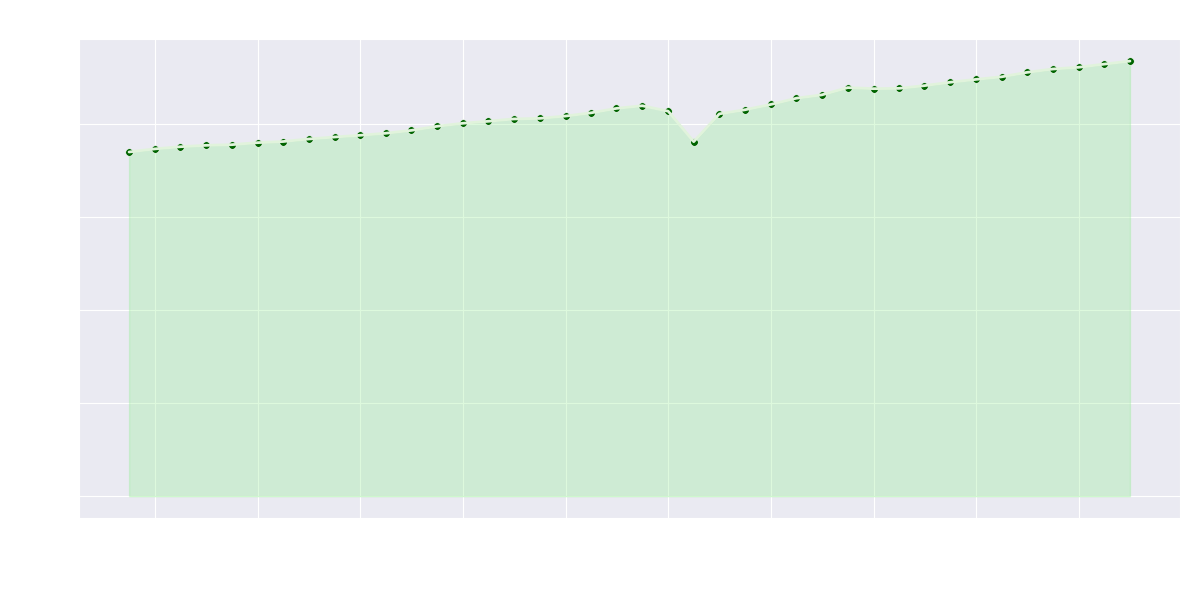

In [80]:
plot_indicator('GDP Real', data['Real Gross Domestic Product'], color_palette='coolwarm')

Índice de Precios al Productor:
Mide los precios promedio que reciben los productores domésticos por sus bienes y servicios.
Puede ser un indicador adelantado de la inflación al consumidor, ya que los aumentos de costos para los productores a menudo se trasladan a los consumidores.
Proporciona información sobre las presiones de costos en diferentes etapas de la producción.
Es útil para predecir cambios en el CPI y para entender las dinámicas de precios en diferentes sectores de la economía


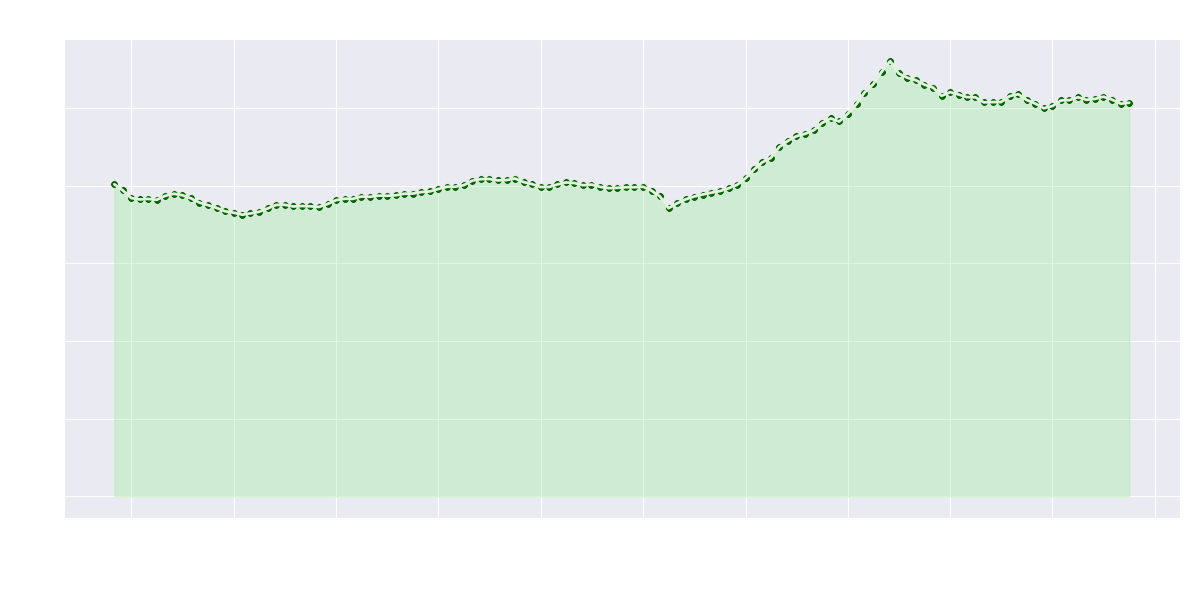

In [81]:
plot_indicator('Índice de Precios al Productor', data['Producer Price Index'], color_palette='coolwarm')

Todo en uno


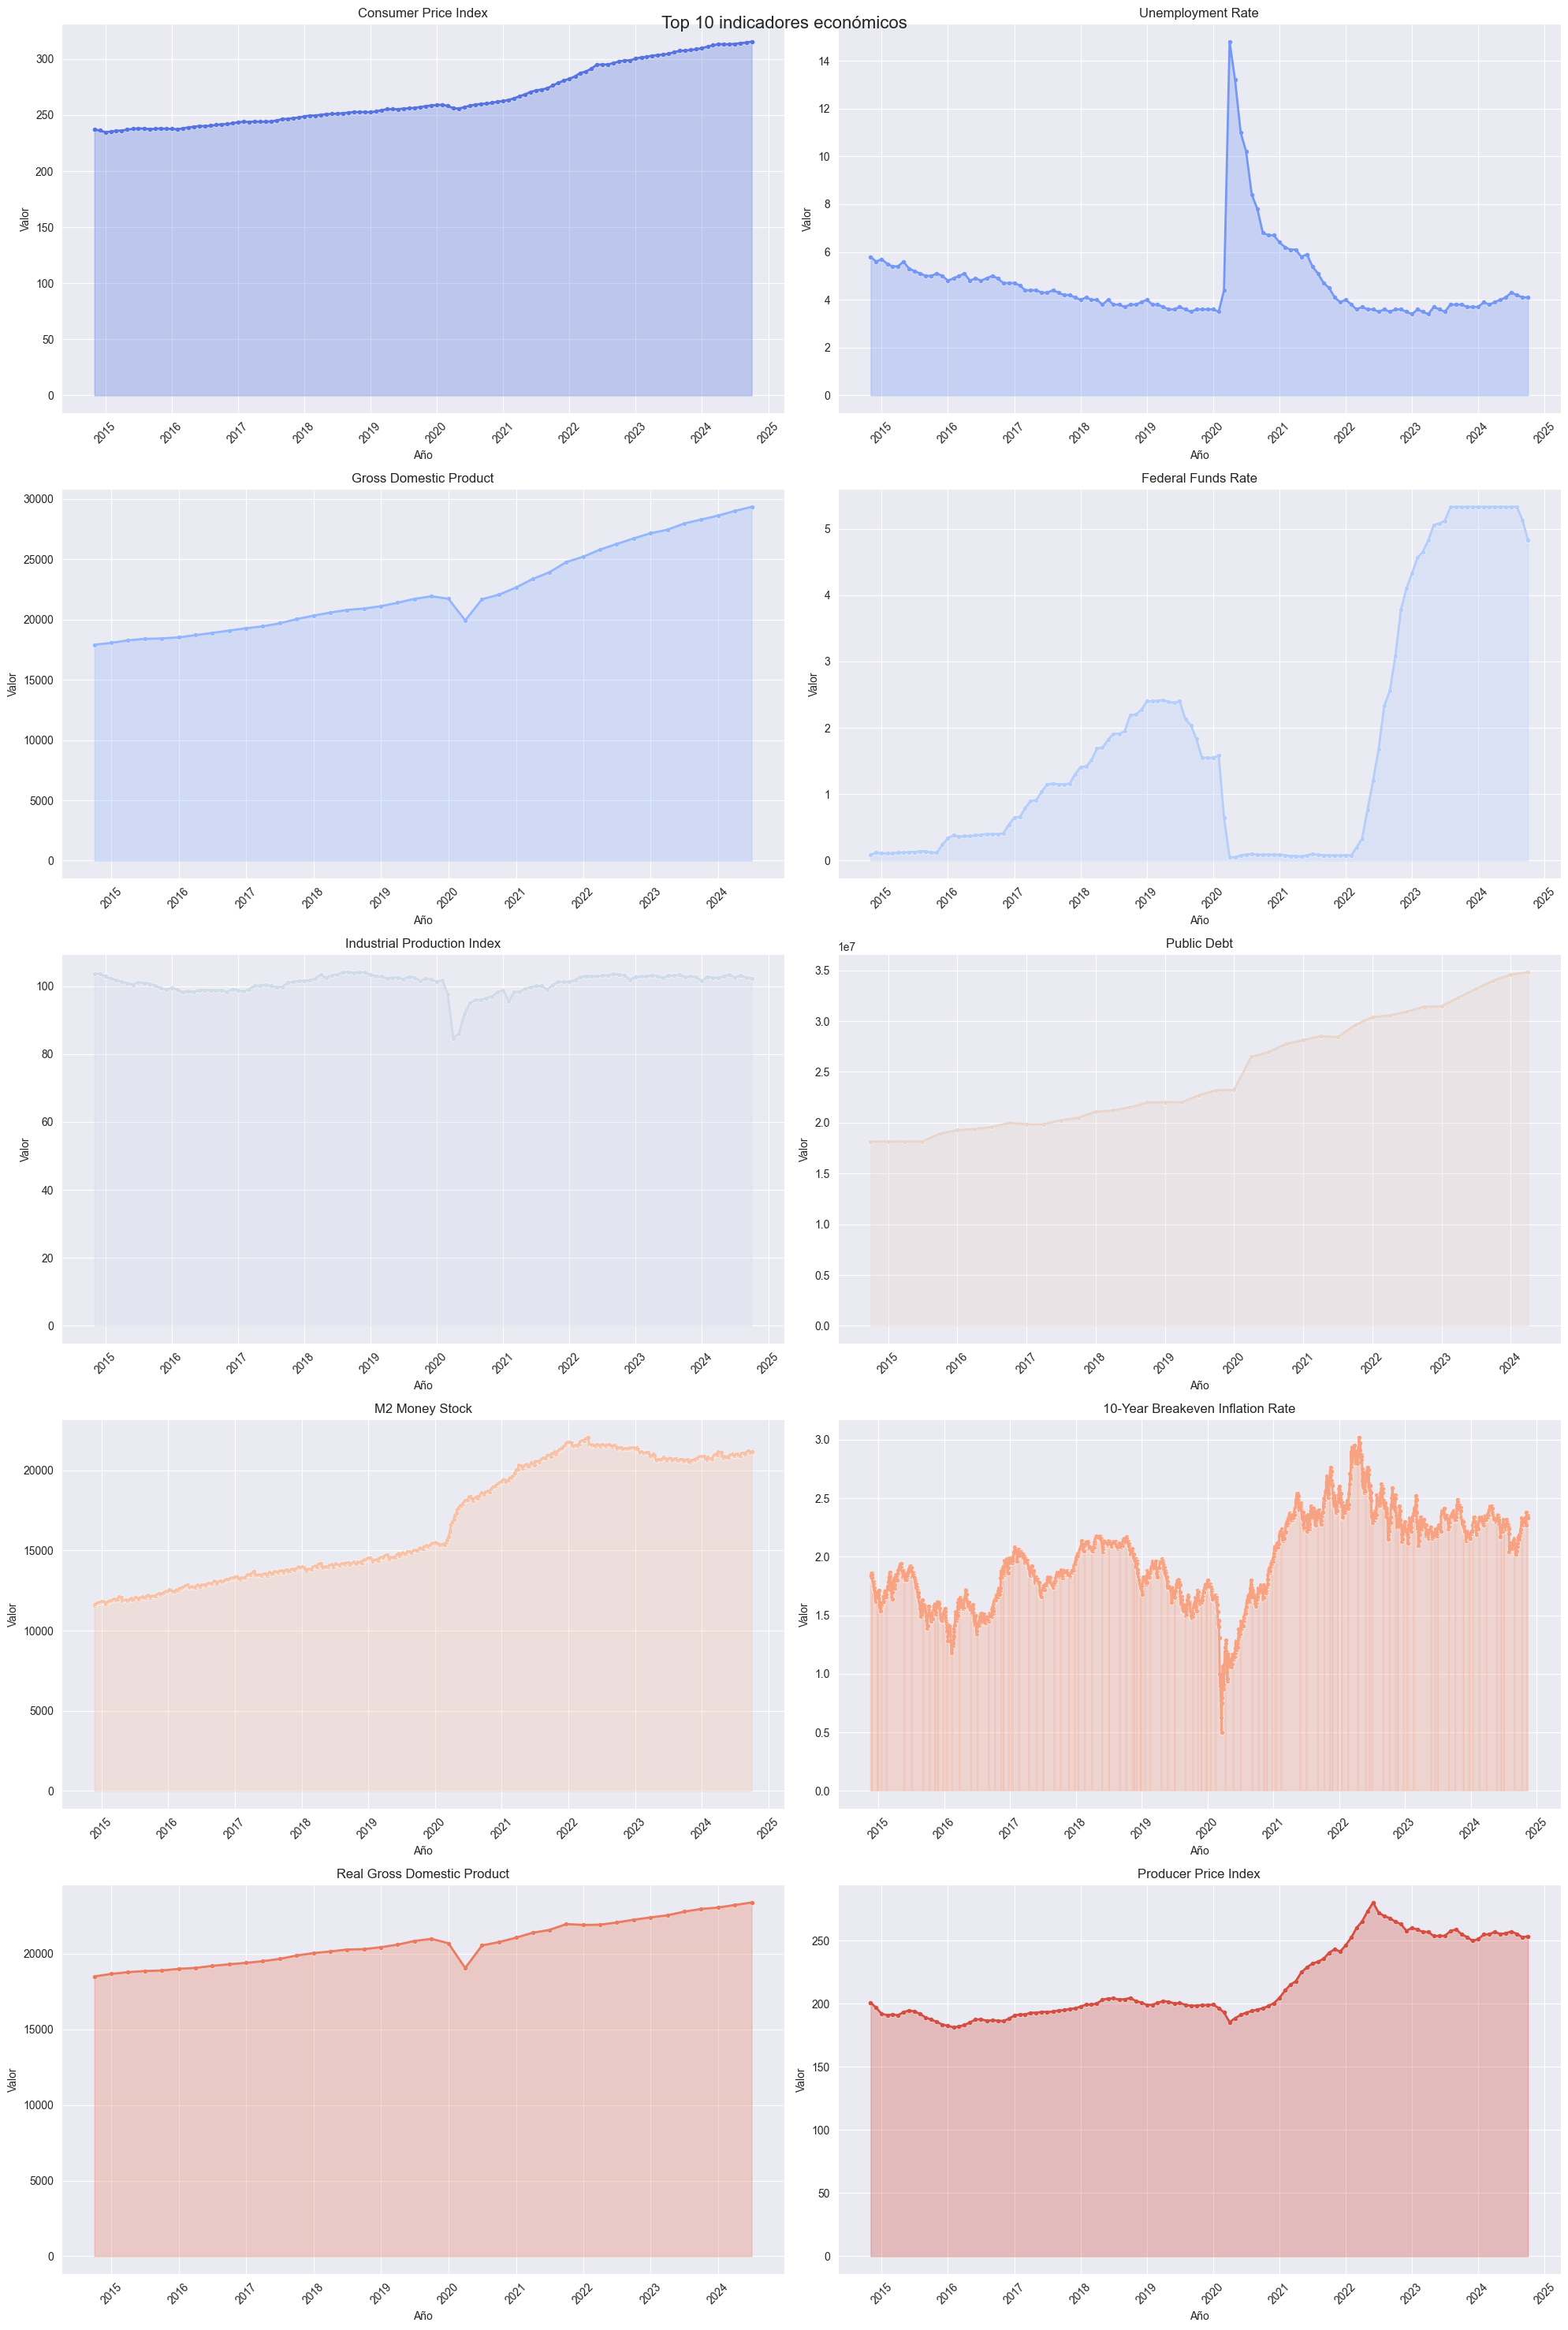

In [82]:
def plot_all_indicators(data, color_palette='coolwarm'):
    fig, axes = plt.subplots(5, 2, figsize=(20, 30))
    fig.suptitle('Top 10 indicadores económicos', fontsize=16)
    
    sns.set_style("whitegrid")
    colors = sns.color_palette(color_palette, n_colors=len(data))
    
    for (name, series), ax, color in zip(data.items(), axes.flatten(), colors):
        sns.lineplot(x=series.index, y=series.values, ax=ax, color=color, linewidth=2)
        
        ax.set_title(name, fontsize=12)
        ax.set_xlabel('Año', fontsize=10)
        ax.set_ylabel('Valor', fontsize=10)
        
        ax.tick_params(axis='x', rotation=45)
        
        # Añade un area bajo la curva
        ax.fill_between(series.index, series.values, alpha=0.3, color=color)
        
        # Marcar los puntos de datos:
        sns.scatterplot(x=series.index, y=series.values, ax=ax, s=20, color=color)
    
    plt.tight_layout()
    plt.show()

# Todo en una figura
plot_all_indicators(data)

In [83]:
api_key = '0a9d1712b624ae3d4ff4546cd94cc1ee'
base_url_2 = "https://api.stlouisfed.org/fred/"


def get_fred_data(series_id, start_date, end_date=None):
    if end_date is None:
        end_date = datetime.now().strftime('%Y-%m-%d')
    
    url = f"{base_url_2}series/observations"
    params = {
        "series_id": series_id,
        "api_key": api_key,
        "file_type": "json",
        "observation_start": start_date,
        "observation_end": end_date
    }
    response = requests.get(url, params=params)
    data = response.json()
    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'], errors='coerce')
    return df.set_index('date')['value']

Gráfico del CPI por sectores



3. Gráfico del Índice de Precios al Consumidor (CPI) por sectores
---------------------------------------------------------------


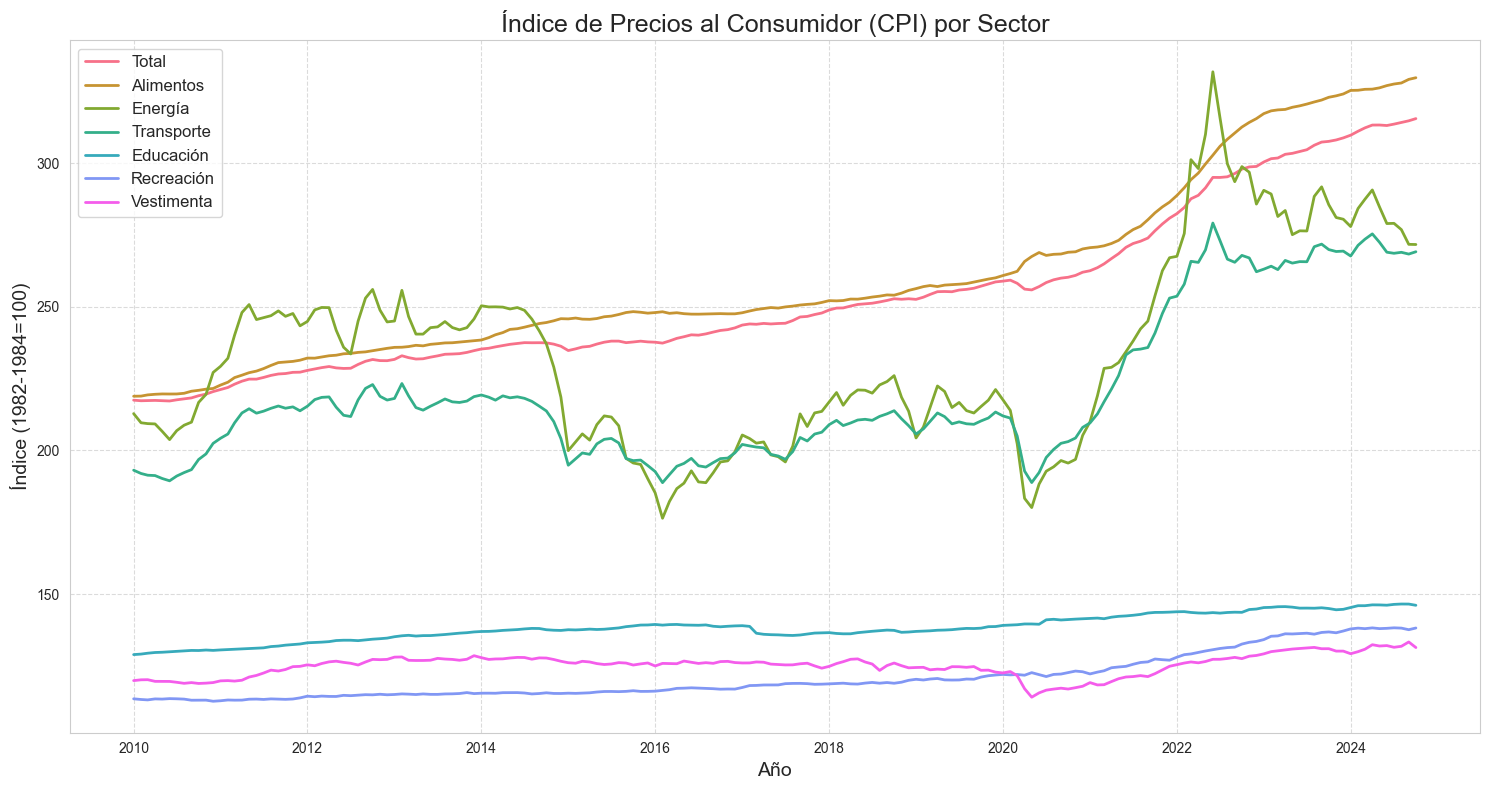


Este gráfico muestra la evolución del Índice de Precios al Consumidor (CPI) para diferentes sectores desde 2010.
Observaciones clave:
- El CPI general (línea 'Total') muestra una tendencia ascendente constante, indicando inflación.
- Los precios de la energía y el transporte muestran mayor volatilidad.
- Los costos de educación han aumentado más rápidamente que el promedio general.
- Los precios de la vestimenta han permanecido relativamente estables en comparación con otros sectores.


In [84]:
print("\n3. Gráfico del Índice de Precios al Consumidor (CPI) por sectores")
print("---------------------------------------------------------------")

tickers_cpi = ['CPIAUCSL', 'CPIFABSL', 'CPIENGSL', 'CPITRNSL', 'CPIEDUSL', 'CPIRECSL', 'CPIAPPSL']
sectors = ['Total', 'Alimentos', 'Energía', 'Transporte', 'Educación', 'Recreación', 'Vestimenta']

cpi_data = pd.DataFrame()
for ticker in tickers_cpi:
    cpi_data[ticker] = get_fred_data(ticker, '2010-01-01')

# Definir una paleta de colores personalizada con buen contraste
colors = sns.color_palette("husl", len(tickers_cpi))

# Crear la figura
plt.figure(figsize=(15, 8))

# Iterar sobre los tickers y los sectores
for ticker, sector, color in zip(tickers_cpi, sectors, colors):
    plt.plot(cpi_data.index, cpi_data[ticker], lw=2, label=sector, color=color)

# Personalizar el gráfico
plt.title('Índice de Precios al Consumidor (CPI) por Sector', fontsize=18)
plt.ylabel('Índice (1982-1984=100)', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEste gráfico muestra la evolución del Índice de Precios al Consumidor (CPI) para diferentes sectores desde 2010.")
print("Observaciones clave:")
print("- El CPI general (línea 'Total') muestra una tendencia ascendente constante, indicando inflación.")
print("- Los precios de la energía y el transporte muestran mayor volatilidad.")
print("- Los costos de educación han aumentado más rápidamente que el promedio general.")
print("- Los precios de la vestimenta han permanecido relativamente estables en comparación con otros sectores.")